#### Halo orbit around Sun-Earth $L_1$

In [1]:
# Importing required computing packages
import numpy as np
from scipy.integrate import odeint

# Importing required plotting packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Defining the CRTBP dynamics function
def free_dynamics(X, t):
    
    # The spacecraft's state vector X = [position velocity] at time t
    x, y, z, xdot, ydot, zdot = X
    
    # Sun-spacecraft distance
    r1 = np.sqrt((x     + mu)**2 + y**2 + z**2)
    # Earth-spacecraft distance
    r2 = np.sqrt((x - 1.+ mu)**2 + y**2 + z**2)
    
    # CRTBP normalized equations of motion in the rotating frame (already demonstrated) 
    xddot  = x + 2.*ydot - (1.-mu)*(x + mu)/r1**3 - mu*(x -1.+mu)/r2**3

    yddot  = -2.*xdot + y*(1.-(1.-mu)/r1**3 - mu/r2**3)

    zddot  = -z*((1.-mu)/r1**3 + mu/r2**3)
    
    # Returning the state's derivitive X' = [velocity acceleration]
    return np.array([xdot, ydot, zdot, xddot, yddot, zddot])

In [3]:
# Sun-Earth fundamental constant 
mu = 3.05*10**(-6) 

# State initial condition
X0 = np.array([0.99197555537727, 0, -0.00191718187218, 0, -0.01102950210737, 0])

# Time interval of the simulation
Tmax = 1.5
#N = 200*Tmax+1
N =301
t = np.linspace(0.0, Tmax, N)

# Solving the equations of motion
X = odeint(free_dynamics, X0, t)

In [4]:
x,  y,  z  = X.T[:3]

Y=np.zeros((len(X),3))
Y[:,0] = np.flipud(X[:,0]); Y[:,1] = np.flipud(-X[:,1]); Y[:,2] = np.flipud(X[:,2])

x = np.append(x,Y[:,0]); y = np.append(y,Y[:,1]); z = np.append(z,Y[:,2])

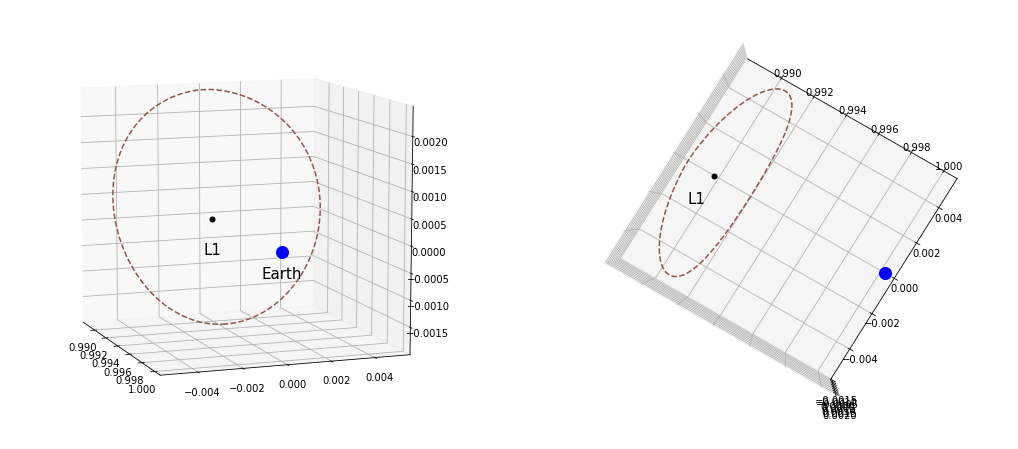

In [26]:
fig = plt.figure(figsize=[18, 8])

## Front view  
ax = fig.add_subplot(1, 2, 1, projection='3d')
#x,  y,  z  = X.T[:3]
ax.plot(x, y, z, '--C5')
ax.plot([1-mu], [0], [0], 'ob', markersize=12)
ax.plot([1-mu-(mu/3)**(1/3)], [0], [0], 'ok', markersize=5)
ax.text(1-mu-(mu/3)**(1/3), 0, -0.0007, "L1", fontsize=15, horizontalalignment='center')
ax.text(1-mu, 0, -0.0005, "Earth", fontsize=15, horizontalalignment='center')
ax.view_init(10,-20)

## Top view
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(x, y, z, '--C5')
ax2.plot([1-mu], [0], [0], 'ob', markersize=12)
ax2.plot([1-mu-(mu/3)**(1/3)], [0], [0], 'ok', markersize=5)
ax2.text(1-mu-(mu/3)**(1/3), -0.0015, 0, "L1", fontsize=15, horizontalalignment='center')
ax2.view_init(90)


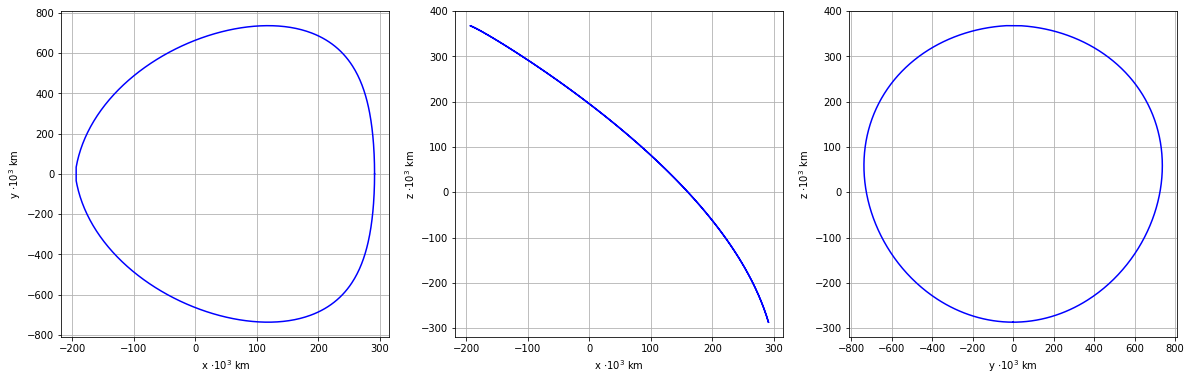

In [28]:
fig = plt.figure(figsize=[20, 6])
R = 1.496e+05 #(Mégamètre)
L1 = 0.9900289479871328
xL1 = L1*R
## Front view  
ax = fig.add_subplot(1, 3, 1)
ax.plot(x*R - xL1, y*R, 'b')
ax.set_xlabel('x $\cdot 10^3$ km')
ax.set_ylabel('y $\cdot 10^3$ km')
ax.grid(True)
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(x*R - xL1, z*R, 'b')
ax2.set_xlabel('x $\cdot 10^3$ km')
ax2.set_ylabel('z $\cdot 10^3$ km')
ax2.grid(True)
ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(y*R, z*R, 'b')
ax3.set_xlabel('y $\cdot 10^3$ km')
ax3.set_ylabel('z $\cdot 10^3$ km')
ax3.grid(True)

#### Halo orbit around Sun-Earth $L_2$

In [9]:
# Sun-Earth fundamental constant 
mu = 3.05*10**(-6) 

# State initial condition
X20 = np.array([1.00842815565444, 0, 0.0001, 0, 0.00981039306520, 0])

# Time interval of the simulation
Tmax = 3.06/2
#N = 200*Tmax+1
N =501
t2 = np.linspace(0.0, Tmax, N)

# Solving the equations of motion
X2 = odeint(free_dynamics, X20, t)

In [10]:
x2, y2, z2 = X2.T[:3]

Y2=np.zeros((len(X2),3))
Y2[:,0] = np.flipud(X2[:,0]); Y2[:,1] = np.flipud(-X2[:,1]); Y2[:,2] = np.flipud(X2[:,2])

x2 = np.append(x2,Y2[:,0]); y2 = np.append(y2,Y2[:,1]); z2 = np.append(z2,Y2[:,2])

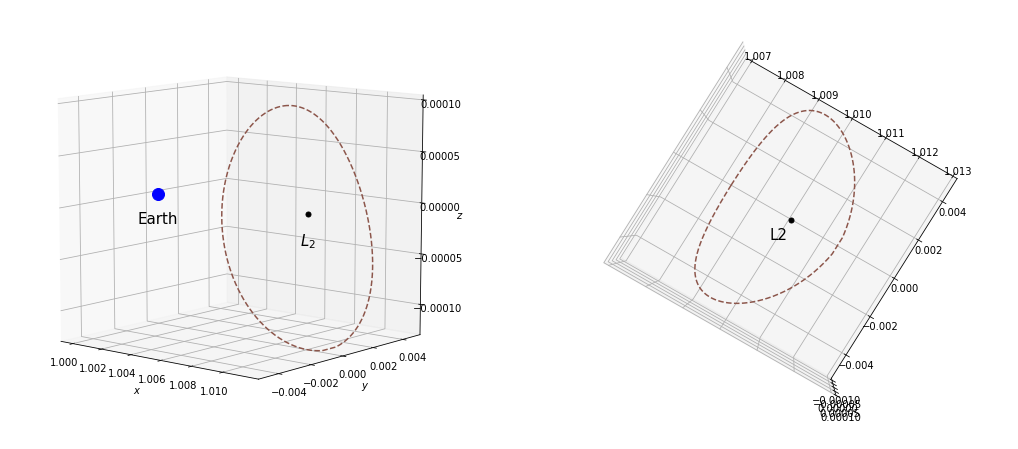

In [25]:
fig = plt.figure(figsize=[18, 8])

## Front view  
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(x2, y2, z2, '--C5')
ax.plot([1-mu], [0], [0], 'ob', markersize=12)
ax.plot([1-mu+(mu/3)**(1/3)], [0], [0], 'ok', markersize=5)
ax.text(1-mu, 0, -0.00003, "Earth", fontsize=15, horizontalalignment='center')
ax.text(1-mu+(mu/3)**(1/3), 0, -0.00003, "$L_2$", fontsize=15, horizontalalignment='center')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(10,-50)

## Top view
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(x2, y2, z2, '--C5')
ax2.plot([1-mu], [0], [0], 'ob', markersize=12)
ax2.plot([1-mu+(mu/3)**(1/3)], [0], [0], 'ok', markersize=5)
ax2.text(1-mu+(mu/3)**(1/3), -0.001, 0, "L2", fontsize=15, horizontalalignment='center')
ax2.set_xlim(1.007, 1.013)
ax2.set_ylim(-0.005, 0.005)
ax2.view_init(90)


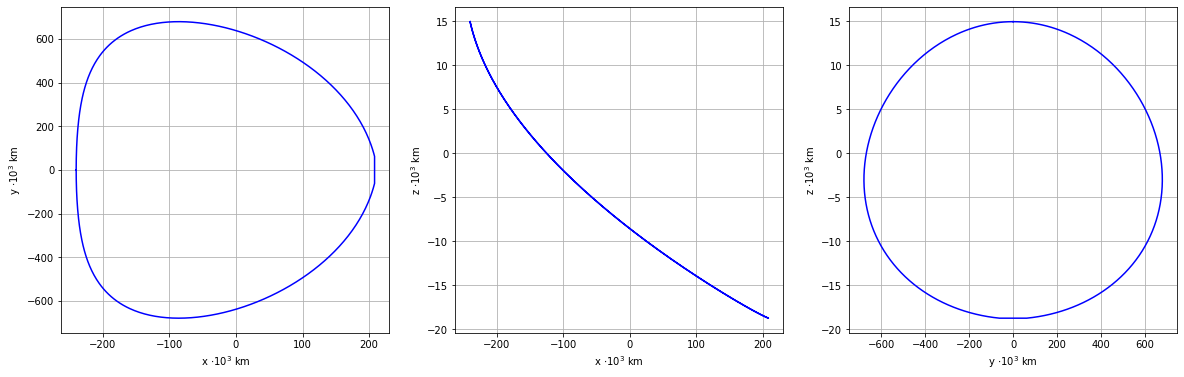

In [29]:
fig = plt.figure(figsize=[20, 6])
R = 1.496e+05
L2 = 1.0100317349912604
xL2 = L2*R
## Front view  
ax = fig.add_subplot(1, 3, 1)
ax.plot(x2*R - xL2, y2*R, 'b')
ax.set_xlabel('x $\cdot 10^3$ km')
ax.set_ylabel('y $\cdot 10^3$ km')
ax.grid(True)
ax = fig.add_subplot(1, 3, 2)
ax.plot(x2*R - xL2, z2*R, 'b')
ax.set_xlabel('x $\cdot 10^3$ km')
ax.set_ylabel('z $\cdot 10^3$ km')
ax.grid(True)
ax = fig.add_subplot(1, 3, 3)
ax.plot(y2*R, z2*R, 'b')
ax.set_xlabel('y $\cdot 10^3$ km')
ax.set_ylabel('z $\cdot 10^3$ km')
ax.grid(True)
plt.show()

### Constructing the same orbits using OrbiPy

In [31]:
#Importing packages
import orbipy as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from orbipy.integrators import dopri5_integrator

In [42]:
#OrbiPy CRTBP Model
model = op.crtbp3_model()

In [43]:
# Constants implemented by default
model.constants_df

,M,m,mu,R,T,comments
Sun-Earth (default),Sun,Earth,0.000003,1.496000e+08,31536000.0,Default constant set for Sun-Earth system
Earth-Moon (default),Earth,Moon,0.012158,3.844000e+05,2358720.0,Default constant set for Earth-Moon system
Sun-Venus (2026-12-05),Sun,Venus,0.000002,1.076024e+08,19414080.0,Venus-D project constant set for Sun-Venus @ 2...
Extreme 0.49,M,m,0.490000,1.000000e+00,1.0,Extreme constant set


In [37]:
# Initial state
s0 = np.array([0.99197555537727, 0, -0.00191718187218, 0, -0.01102950210737, 0])
# Borders
left = op.eventX(model.L1-1000000/model.R)
right = op.eventX(model.L1+1000000/model.R)

In [38]:
# Compute required correction
corr = op.border_correction(model, op.y_direction(), [left], [right])
dv = corr.calc_dv(0.0, s0)

In [48]:
# Apply correction
s0 += dv
# Propagate model
df = model.prop(s0, 0.0, np.pi)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f56c43a0d50>,
      dtype=object)

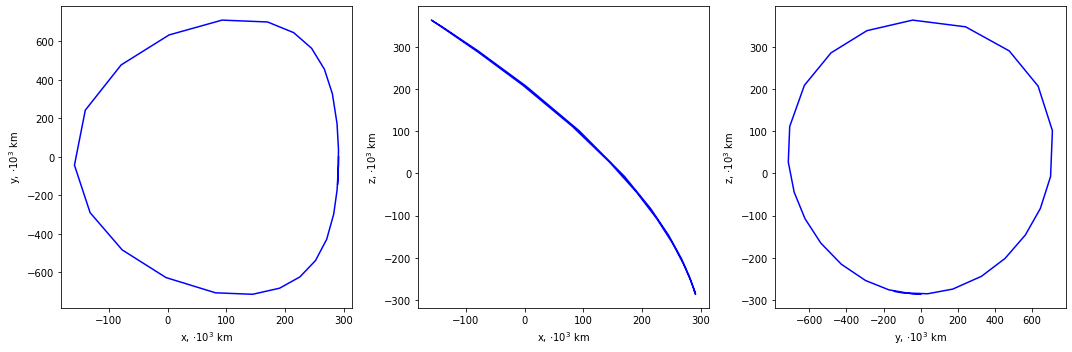

In [41]:
plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
plotter.plot_proj(df, centers={'x':model.L1})

In [44]:
s0 = np.array([1.00842815565444, 0, 0.0001, 0, 0.00981039306520, 0])
left = op.eventX(model.L2-1000000/model.R)
right = op.eventX(model.L2+1000000/model.R)

In [45]:
corr = op.border_correction(model, op.y_direction(), [left], [right])
dv = corr.calc_dv(0.0, s0)

In [46]:
# apply correction
s0 += dv
df = model.prop(s0, 0.0, 3.1026265802911)

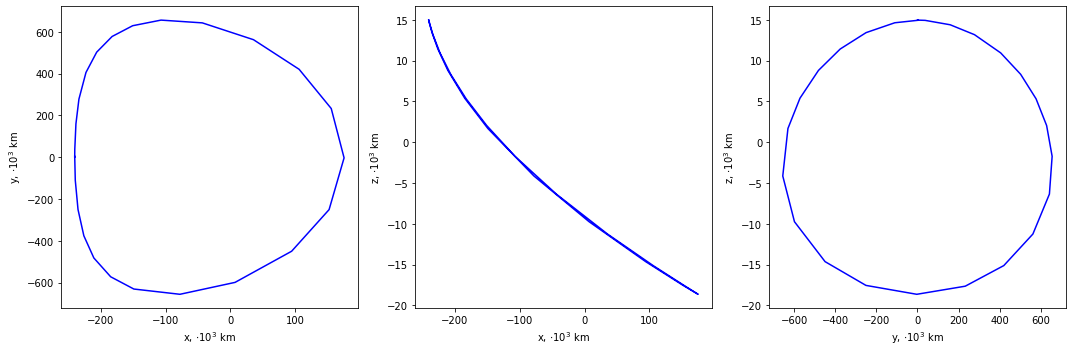

In [47]:
plotter.plot_proj(df, centers={'x':model.L2});